In [7]:
#To install the required packages uncomment the following line
#%pip install pandas openpyxl seaborn

     |████████████████████████████████| 294 kB 4.4 MB/s            
You should consider upgrading via the '/afs/cern.ch/work/f/fraleman/waenv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
url = "https://docs.google.com/spreadsheets/d/1euDfLLXG5vzFyvdg0-5Btzs14547jU6ah6n5oljttTo/export?format=xlsx"
df = pd.read_excel(url, sheet_name="Calibration_C")
#df = pd.read_excel(url, sheet_name="Calibration_M")
print(df.head())  # this is to check that everything is fine

         DAY    RUN  ENDPOINT  CHANNEL  MODULE   SNR     GAIN  \
0 2025-09-08  39328       106       32  C1 (1)  6.64  3555.00   
1 2025-09-08  39328       106       33  C1 (2)  5.43  2031.78   
2 2025-09-08  39329       106       30  C2 (1)  5.83  2204.34   
3 2025-09-08  39329       106       31  C2 (2)  6.76  4211.99   
4 2025-09-08  39330       106       34  C3 (1)  5.07  2118.64   

   BSL std dev [ticks]  SPE std dev [ticks]   Average #PE  SPE ampl [ADC]  
0               535.48               643.73          2.79              20  
1               373.93               415.78          3.40              14  
2               377.83               433.74          3.32              18  
3               623.39               755.71          2.98              22  
4               417.97               494.76          3.15              12  


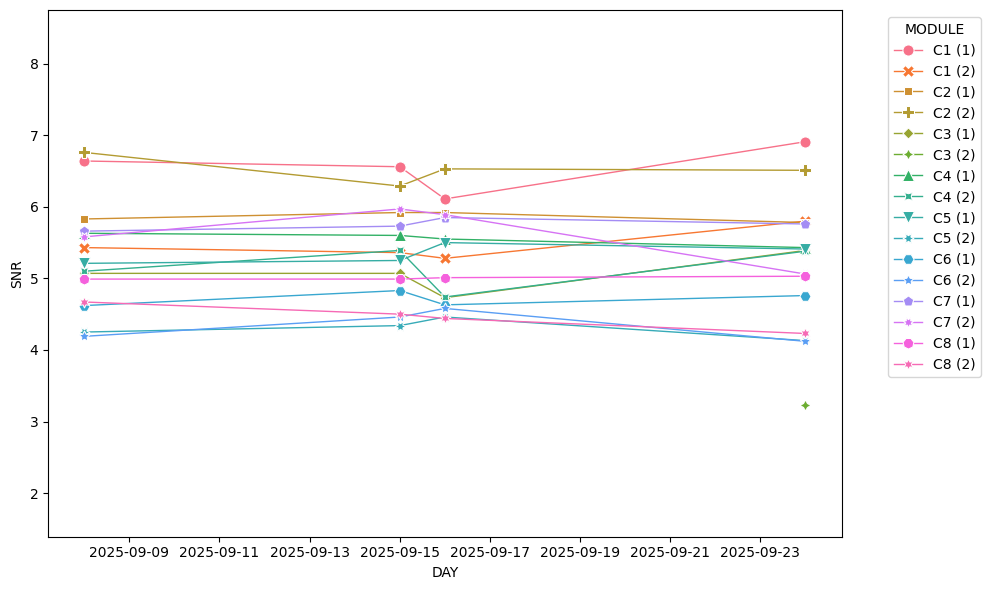

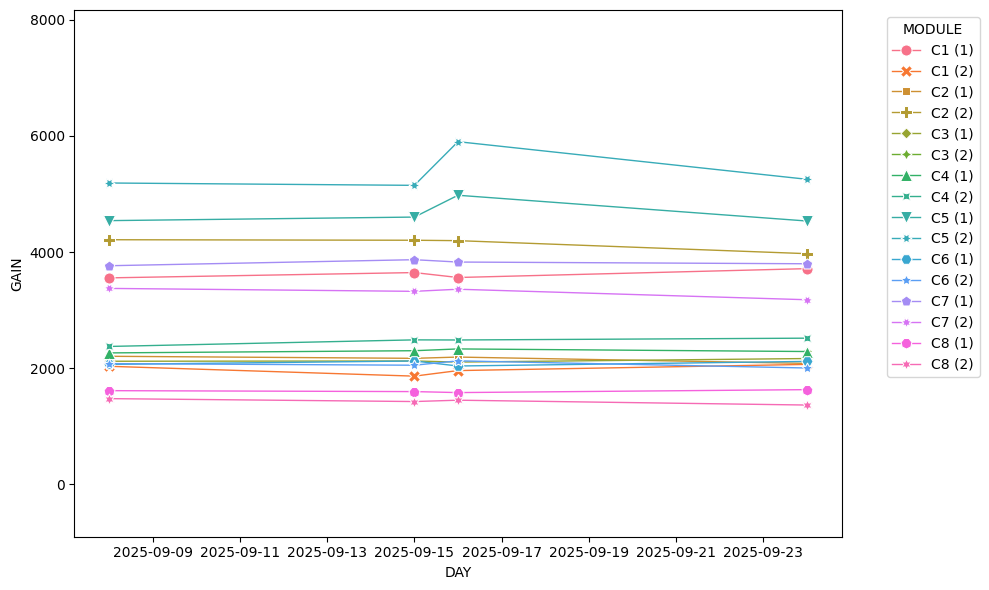

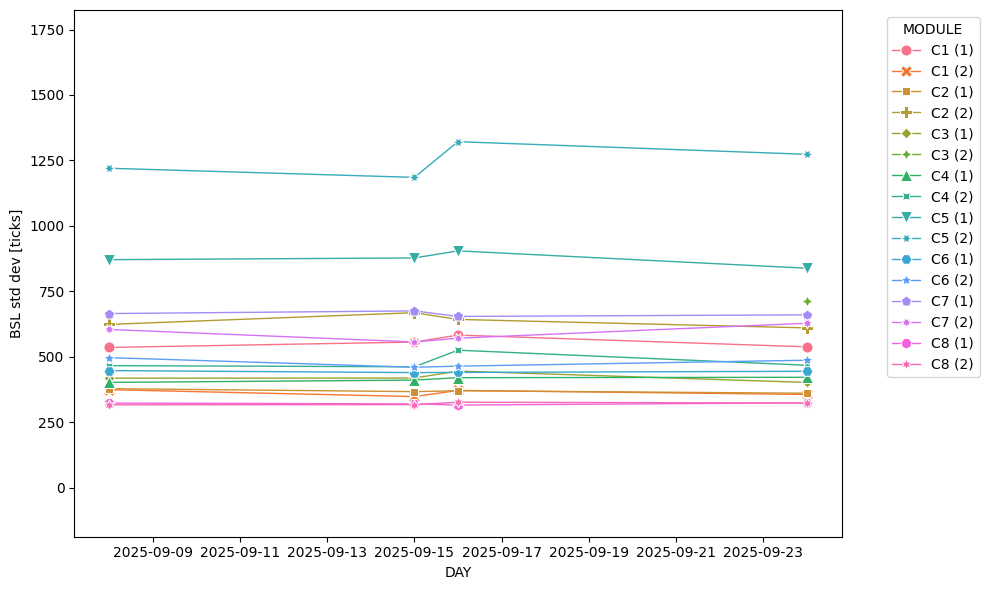

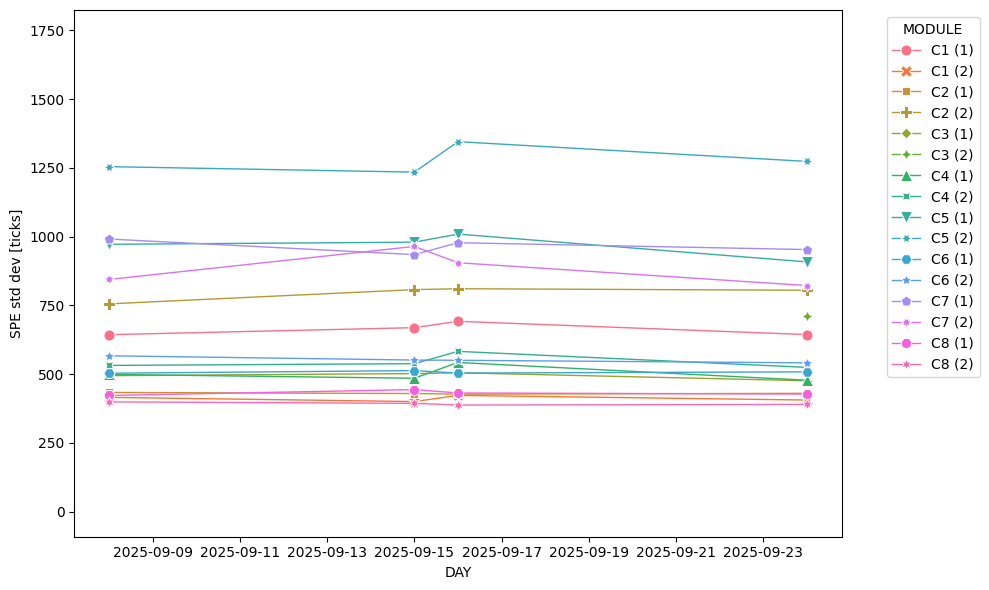

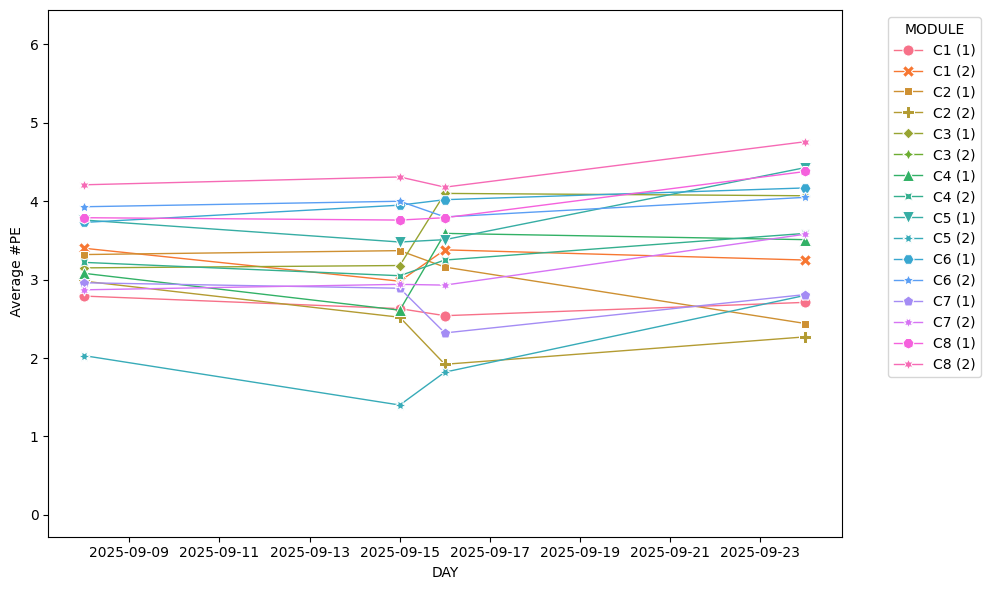

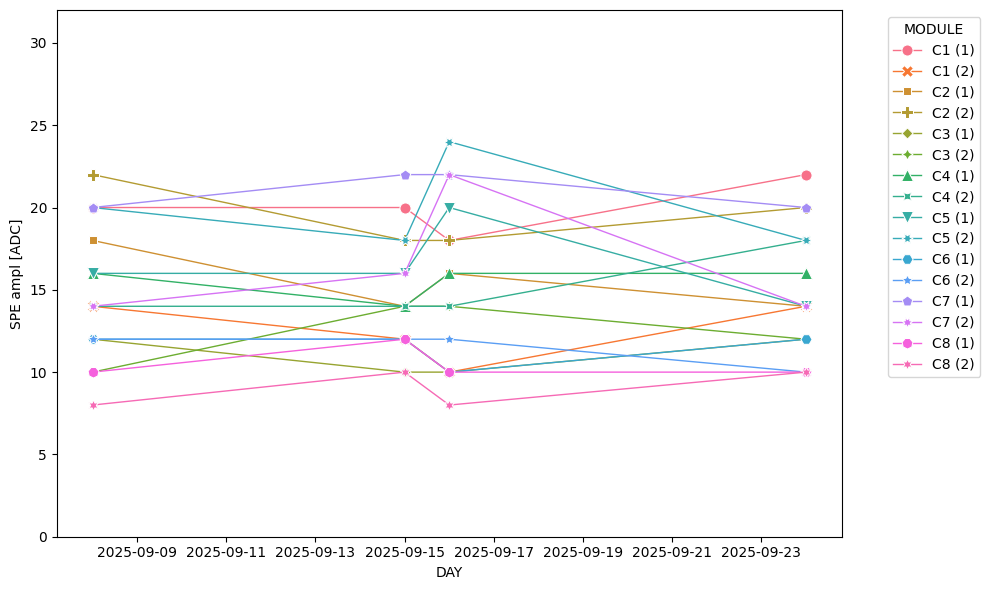

In [41]:
df['DAY'] = pd.to_datetime(df['DAY'])

module_index = df.columns.get_loc("MODULE")
columns_to_plot = df.columns[module_index+1:]

for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.lineplot(
    #sns.scatterplot(
        data=df,
        x='DAY',
        y=col,
        hue='MODULE',   
        style='MODULE',    # different marker shapes
        markers=True,
        #marker='o',
        dashes=False,
        linewidth=1.0,   
        markersize=8     
    )

    y_min, y_max = df[col].min(), df[col].max()
    margin = (y_max - y_min) * 0.5
    plt.ylim(y_min - margin, y_max + margin)
    
    plt.legend(title="MODULE", bbox_to_anchor=(1.05, 1), loc='upper left')
    #plt.xticks(rotation=45)
    plt.tight_layout()